<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Another real dataset on house sales in King County, USA.

The .csv file `kc_house_data.csv` is included in the course material.<br>
Let's practice our skills in Linear Regression!<br>
[Link to the dataset at kaggle for more information](https://www.kaggle.com/harlfoxem/housesalesprediction/data)

In [4]:
# Importing some libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn import metrics

In [5]:
kch_data = pd.read_csv('kc_house_data.csv')
kch_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
kch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


**Check if there is any 0 in  yr_renovated, bedrooms or bathrooms column. If yes, display the list of value to validate**

In [ ]:
# code here please

In [16]:
0 in kch_data['yr_renovated'].unique()

True


In [ ]:
# code here please

In [17]:
kch_data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [ ]:
# code here please

In [18]:
0 in kch_data['bedrooms'].unique()

True

In [ ]:
# code here please

In [11]:
kch_data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [ ]:
# code here please

In [19]:
0 in kch_data['bathrooms'].unique()

True

In [ ]:
# code here please

In [12]:
kch_data['bathrooms'].unique()

array([ 1.  ,  2.25,  3.  ,  2.  ,  4.5 ,  1.5 ,  2.5 ,  1.75,  2.75,
        3.25,  4.  ,  3.5 ,  0.75,  4.75,  5.  ,  4.25,  3.75,  0.  ,
        1.25,  5.25,  6.  ,  0.5 ,  5.5 ,  6.75,  5.75,  8.  ,  7.5 ,
        7.75,  6.25,  6.5 ])

**Do some data mining.**
* drop all the renovated ones, they are with yr_renovated = 0 (we don't need columns sqft_living15	sqft_lot15 after this)
* drop all with no bathroom and no bedroom
* get an overview, how many entries you have after this? use `info()`

In [ ]:
# code here please

In [21]:
#Let's drop all the renovated also with no bed and no bath!
kch = kch_data[kch_data['yr_renovated']==0]
kch = kch[kch['bedrooms']!=0]
kch = kch[kch['bathrooms']!=0]
kch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20683 entries, 0 to 21612
Data columns (total 21 columns):
id               20683 non-null int64
date             20683 non-null object
price            20683 non-null float64
bedrooms         20683 non-null int64
bathrooms        20683 non-null float64
sqft_living      20683 non-null int64
sqft_lot         20683 non-null int64
floors           20683 non-null float64
waterfront       20683 non-null int64
view             20683 non-null int64
condition        20683 non-null int64
grade            20683 non-null int64
sqft_above       20683 non-null int64
sqft_basement    20683 non-null int64
yr_built         20683 non-null int64
yr_renovated     20683 non-null int64
zipcode          20683 non-null int64
lat              20683 non-null float64
long             20683 non-null float64
sqft_living15    20683 non-null int64
sqft_lot15       20683 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [26]:
#kch[kch['view']==0].count()

In [23]:
kch_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Let's consider the features:
* `'bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_basement'`

In [24]:
kch = kch[['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_basement','price']]

In [25]:
kch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20683 entries, 0 to 21612
Data columns (total 7 columns):
bedrooms         20683 non-null int64
bathrooms        20683 non-null float64
sqft_living      20683 non-null int64
grade            20683 non-null int64
sqft_above       20683 non-null int64
sqft_basement    20683 non-null int64
price            20683 non-null float64
dtypes: float64(2), int64(5)
memory usage: 1.3 MB


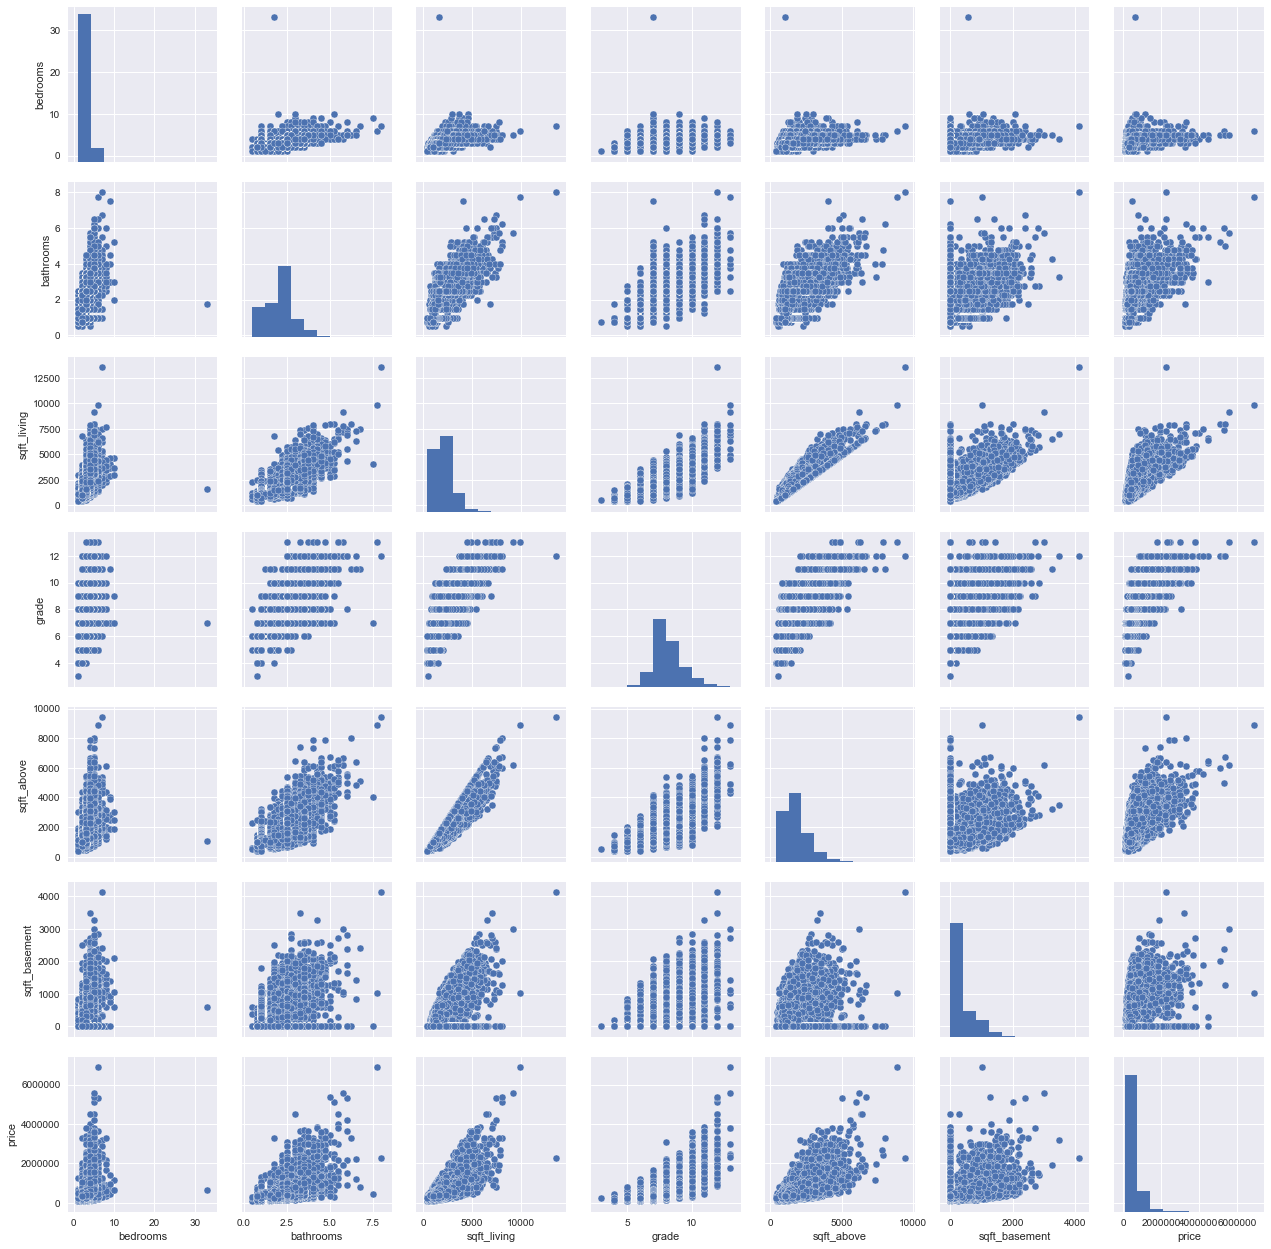

In [9]:
#plt.scatter(kch['long'], kch['price'])
sns.pairplot(kch)

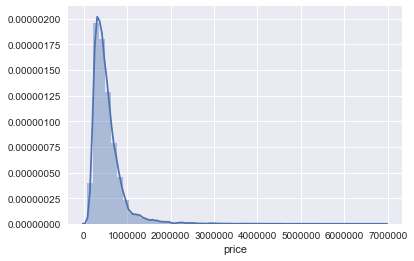

In [10]:
sns.distplot(kch['price'])

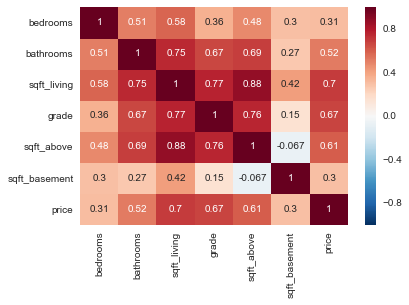

In [11]:
sns.heatmap(kch.corr(), annot=True)

## X, y arrays and Train Test Split 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = kch[['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_basement']]
y = kch['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [14]:
X_train.head()

,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_basement
2090,4,1.50,1700,7,1700,0
5899,4,3.50,3280,10,3280,0
19815,3,2.50,1320,7,1320,0
447,3,2.00,1260,7,1260,0
7529,4,2.25,2400,8,1800,600


## Creating and Training the Model

In [15]:
from sklearn import linear_model

In [16]:
lm = linear_model.LinearRegression()

In [17]:
lm.fit(X_train,y_train)

/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evaluation

In [18]:
# print the intercept
print(lm.intercept_)

-517890.979853


In [19]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-3.048862e+04
bathrooms,-3.231897e+04
sqft_living,-3.329002e+14
grade,1.076579e+05
sqft_above,3.329002e+14
sqft_basement,3.329002e+14


## Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [20]:
predictions = lm.predict(X_test)

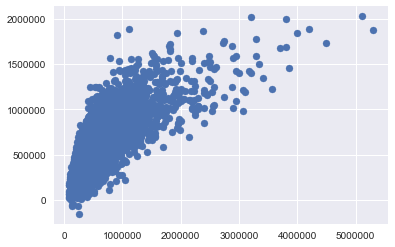

In [21]:
plt.scatter(y_test,predictions)

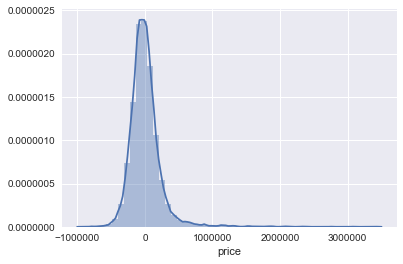

In [22]:
#Residual Histogram
sns.distplot((y_test-predictions),bins=50);

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 154798.891789
MSE: 58515026154.9
RMSE: 241898.793207


## Excellent
You need to practice, practice and practice<br>
You can change features and play with data. Do little more EDA to learn how the features are related. <br>
Explore more datasets on kaggle, there are may other free sites for datasets for your to practice. 